In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def pulse(t, A=0.5, f=1.0, phi=0.0, s=0.5, d=0.5, v=1.0):
    s *= 2
    E = min(s, 1)
    alpha = max(s, 1) - 1

    t_m = np.modf((t - phi) / f)[0] * f
    t_1 = (f * t_m) / (2 * d)
    t_2 = 1 / ((2 / f) * (1 - d)) * t_m + 1 - 1 / (2 * (1 - d))
    T = t_1 if t_m <= d / f else t_2

    y_sine = np.sin(2 * np.pi * T)
    y_ext_sine = np.sign(y_sine) * np.abs(y_sine) ** E
    y_tri = (2 / np.pi) * np.arcsin(y_sine)
    y_lerp = (1 - alpha) * y_ext_sine + alpha * y_tri
    y = A * (y_lerp + v)

    return y

In [25]:
A = 0.5
f = 1.0
phi = 0.0
s = 0.1
d = 0.8
v = 1.0

In [26]:
X = np.linspace(0, 10, 1000)
Y = [pulse(x, A, f, phi, s, d, v) for x in X]

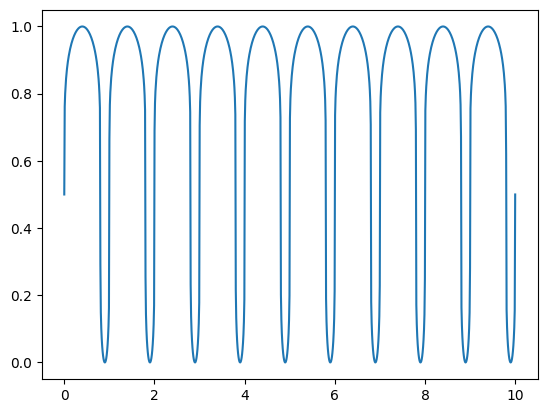

In [27]:
plt.plot(X, Y)
plt.show()